# Hotel Booking Demand

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns



In [4]:
df = pd.read_csv("hotel_bookings.csv")



In [5]:
df.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [7]:
df.describe()



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Missing Value

children         4
country        488
agent        16340
company     112593
dtype: int64


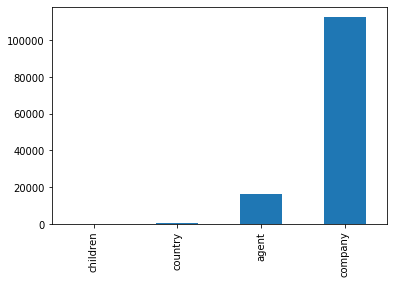

In [8]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing)
missing.plot.bar()



In [9]:
df['hotel'].value_counts()



City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [10]:
df['is_canceled'].value_counts()



0    75166
1    44224
Name: is_canceled, dtype: int64

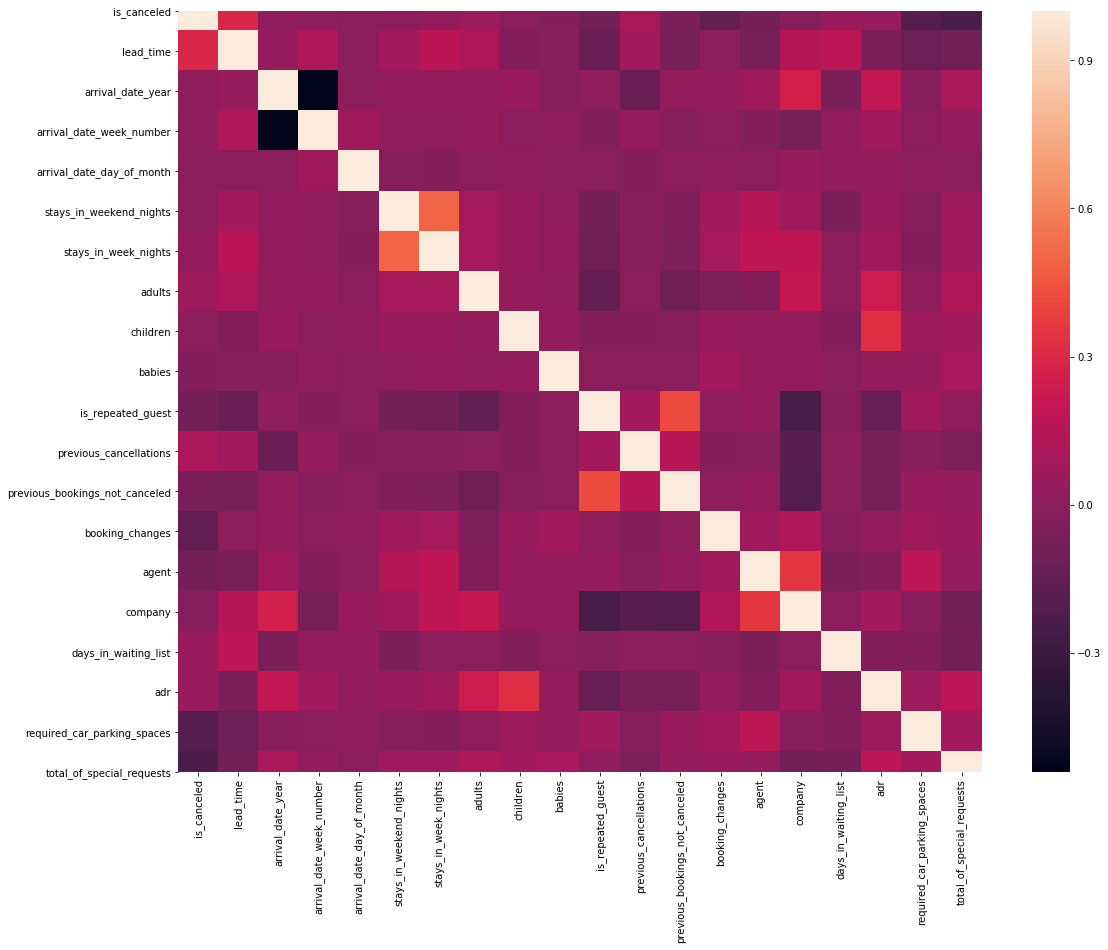

In [11]:
#Correlation of Variables with Each Other

corr = df.corr()
plt.subplots(figsize=(18,14))
sns.heatmap(corr)



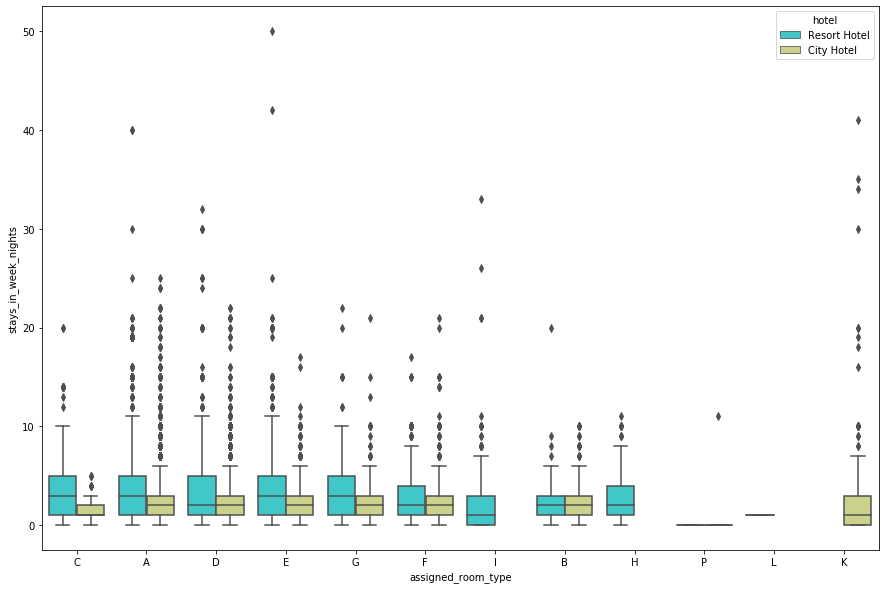

In [12]:
#Box Plot
plt.figure(figsize = (15,10))
sns.boxplot(x = "assigned_room_type", y = "stays_in_week_nights", data = df, hue = "hotel", palette = 'rainbow');



In [13]:
# It is better to copy original dataset, it can be needed in some cases.
data = df.copy()



In [14]:
#Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings

filterwarnings('ignore')



In [15]:
conda install -c conda-forge xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# 1. EDA


# Cancellations by repeated guests

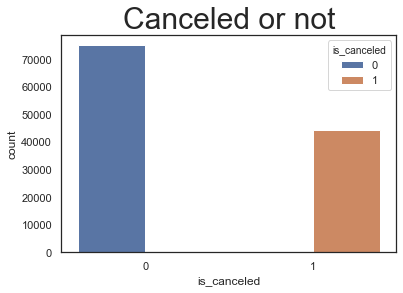

In [16]:
sns.set(style = "white")
plt.title("Canceled or not", fontdict = {'fontsize': 30})
ax = sns.countplot(x = "is_canceled", hue = 'is_canceled', data = data)



### There is no surprise that repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests.

## Boxplot Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

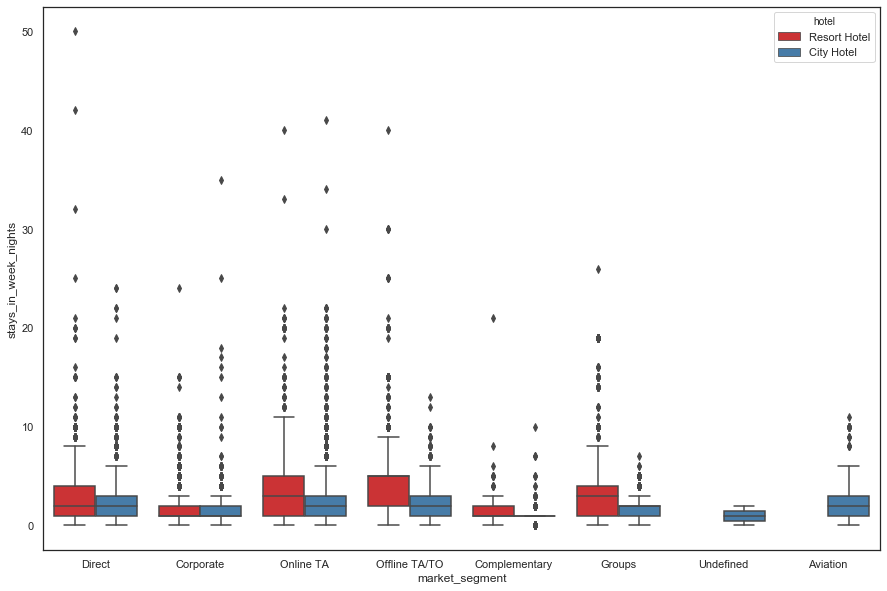

In [17]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", hue = "hotel",data = data, palette = 'Set1');



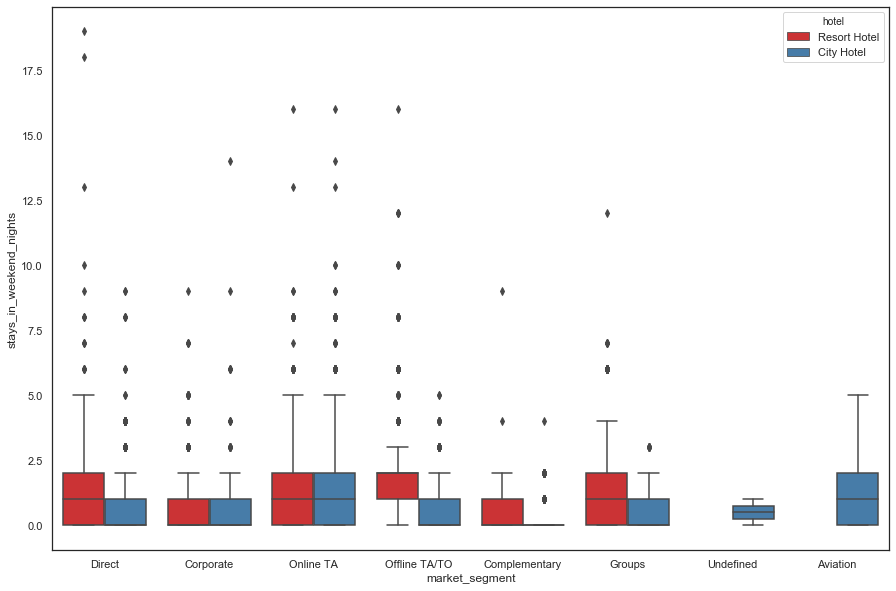

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = data, hue = "hotel", palette = 'Set1')



# Countplot Distribution of Market Segments

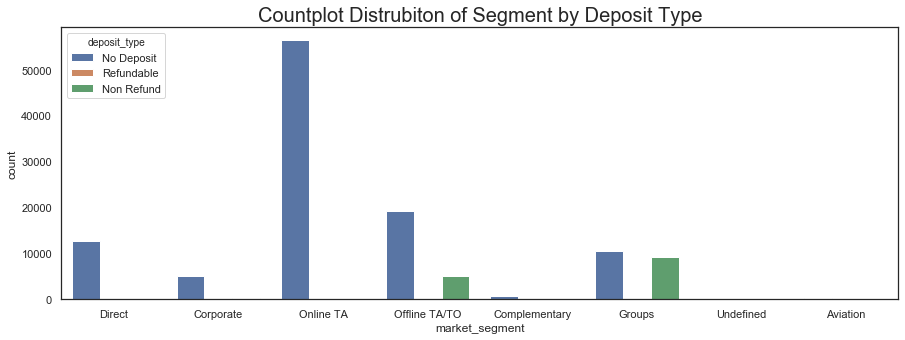

In [19]:
plt.figure(figsize=(15,5))
sns.set(style='white')
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x='market_segment',hue = 'deposit_type', data = data)



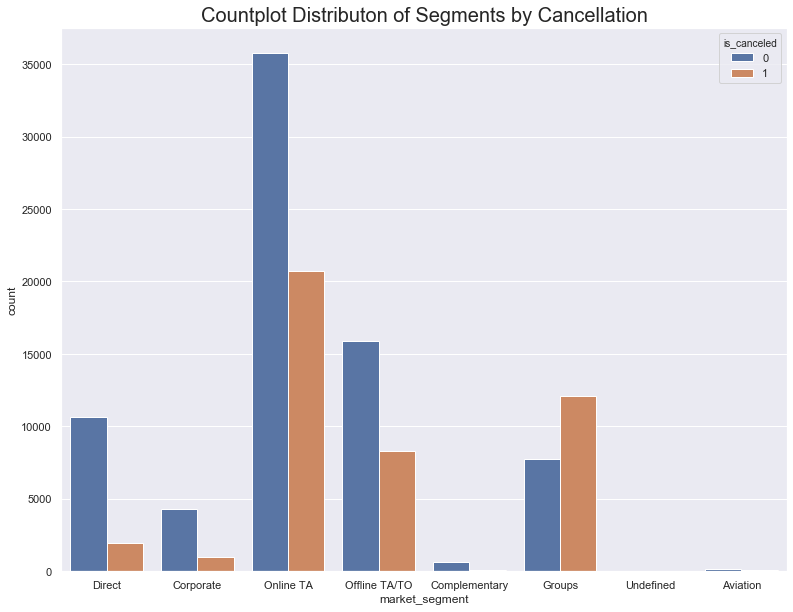

In [20]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = data)



# Density Curve of Lead Time by Cancelation

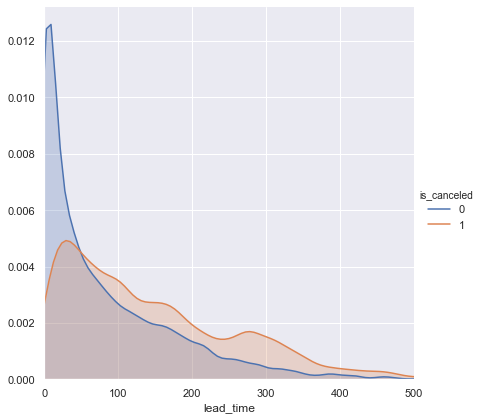

In [21]:
(sns.FacetGrid(data, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());



While lead time is more than roughly 60, people tend to cancel their reservations (cancellation rate is higher after this point). Also people want their holiday or work plans resulted in 100 days which equals to half of the data.

## Monthly Cancellations and Customers by Hotel Types

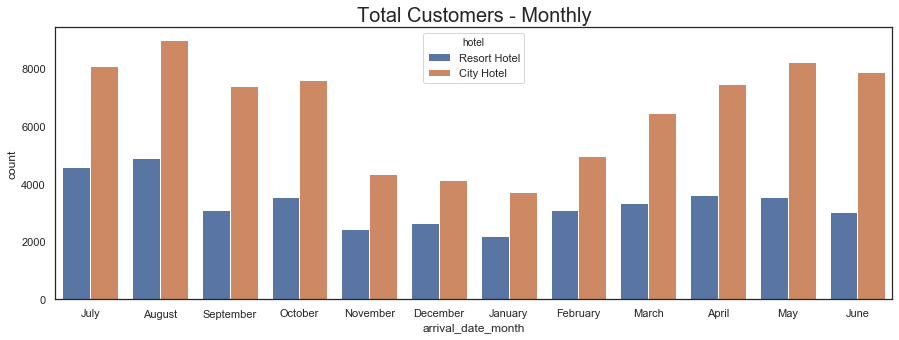

In [22]:
plt.figure(figsize=(15,5))
sns.set(style='white')
plt.title("Total Customers - Monthly", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data)



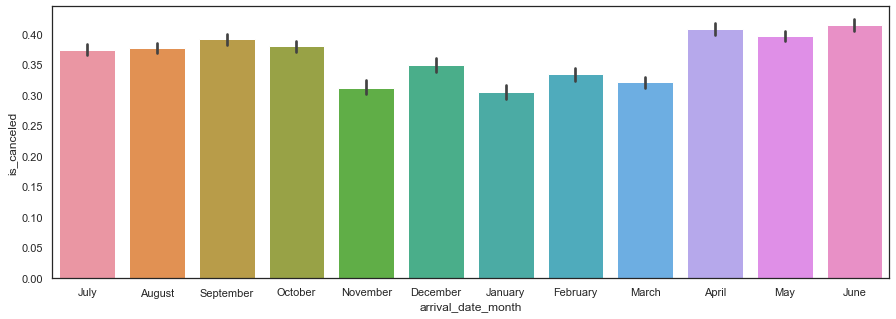

In [23]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'arrival_date_month',y = 'is_canceled',  data = data);



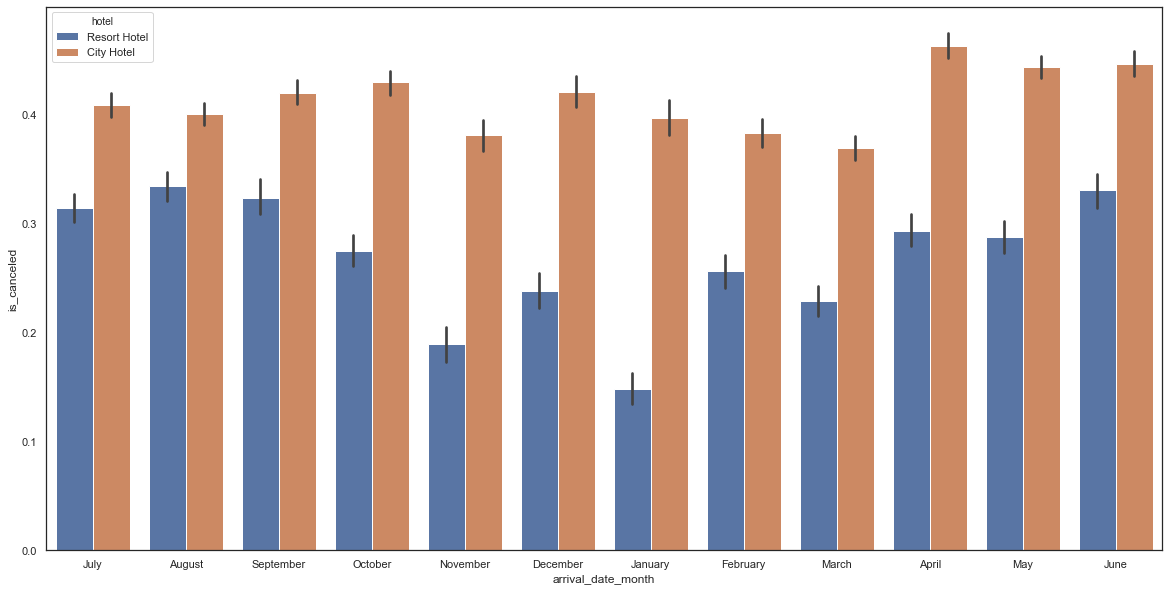

In [24]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = data);



 Looking at the first graph, it can be seen that the city hotels have more customers in all months. Considering proportionally, resort hotels seem to be a little closer to city hotels in summer.

An important interpretation can be made by examining three graphics together. Fewer customers come in the winter months, so when we look at the cancellation rates, it is quite normal that it appears less in the winter months. The point to be noted on these months is that the cancellation rates of city hotels are almost equal to other months even in winter. The fact that the total cancellation rates of the winter months are low is that the cancellation rates of the resort hotels are low in these months. In short, the possibility of cancellation of resort hotels in winter is very low. This information can be a very important factor when predicting 'is_canceled'.

# Preprocessing 
### (Missing Values, Feature Engineering and Standardization)

In [25]:
print ('Number of Missing Values in each Columns :', data.isnull().sum() , sep='\n')



Number of Missing Values in each Columns :
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent         

In [26]:
def perc_mv(x,y):
    perc = y.isnull().sum() / len(x) * 100
    return perc
print('Missing Value Ratios:\n company:{} \n agent:{} \n country:{}'.format(perc_mv(data,data['company']),
                                                                            perc_mv(data,data['agent']),
                                                                            perc_mv(data,data['country'])))

Missing Value Ratios:
 company:94.30689337465449 
 agent:13.686238378423655 
 country:0.40874445095904177


In [27]:
data['agent'].value_counts().count()



333

# We can draw the below inference from the percentage of missing values:
1. As we can see 94.3% of company column are missing values. Therefore we do not have enough values to fill the          rows of company column by predicting, filling by mean etc.It seems that the best option is dropping company column.
2. 13.68% of agent column are missing values, there is no need to drop agent column. But also we should not drop the rows because 13.68% of data is really huge amount and those rows have the chance to have crucial information.
3. There are 333 unique agent, since there are too many agents they may not be predictable. Also NA values can be the agents that are not listed in present 333 agents. We can't predict agents and since missing values are 13% of all data we can't drop them too.
4. It will not be a problem if we drop the rows that have missing values in country column

In [28]:
# We drop Company Column
data = data.drop(['company'],axis=1)



In [29]:
# We have also 4 missing values in children column. If there is no information about children, In my opinion those customers do not have any children.
data['children'] = data['children'].fillna(0)

# Handling Features
We should check the features to create some more meaningful variables and reduce the number of features if it is possible.

In [30]:
data.dtypes



hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [31]:
data['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [32]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0,'City Hotel':1})
data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [33]:
data.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [34]:
data[['adults','babies','children']]



,adults,babies,children
0,2,0,0.0
1,2,0,0.0
2,1,0,0.0
3,1,0,0.0
4,2,0,0.0
...,...,...,...
119385,2,0,0.0
119386,3,0,0.0
119387,2,0,0.0
119388,2,0,0.0


In [35]:
def family(data):
    if ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    else:
        val = 0
    return val

def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [36]:
data['deposit_type'].value_counts()



No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [37]:
def feature(data):
    data["is_family"] = data.apply(family, axis=1)
    data["total_customer"] = data["adults"] + data ["babies"] + data["children"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"] + data["stays_in_week_nights"]
    return data

data = feature(data)



In [38]:
#It is good to drop columns that are inside of new features
data = data.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])



In [39]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
hotel                             119390 non-null int64
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null int64
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non-

# Correlation

In [40]:
data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [41]:
# Lets copy data to check the correlation between variables. 
cor_data = data.copy()


In [42]:
le = LabelEncoder()


In [43]:
# This data will not be used while predicting cancellation. This is just for checking correlation.

cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])



In [44]:
cor_data.corr()
#plt.subplots(figsize=(14,5))
#sns.heatmap(abc)



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,0.008018,...,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.124331,-0.058306,-0.040821,0.172003,-0.247479
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.017678,...,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,-0.013010,0.046522,0.481457,0.017779
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.000349,...,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,-0.043972,0.072265,0.380179,0.157167
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.065840,...,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.052711,0.052127,-0.065963,0.031438
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.015205,...,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.010427,0.027252,0.008746,0.021536
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.017381,...,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.010611,0.025220,0.007773,0.018719
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.007086,...,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,0.014710,0.006742,-0.008616,-0.027408
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.045744,...,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558,0.052306,0.101426,-0.114275,0.762790
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.036742,...,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607,0.050424,0.101665,-0.079999,0.941005
meal,0.008018,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,0.045744,0.036742,1.000000,...,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,-0.041727,-0.005975,-0.090725,0.045277


In [45]:
cor_data.corr()["is_canceled"].sort_values()



reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
agent                            -0.127883
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
meal                             -0.017678
is_family                        -0.013010
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
total_nights                      0.017779
stays_in_week_nights              0.024765
total_customer                    0.046522
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
previous_ca

As we can see in the sorted list, reservation_status seems to be most impactful feature. With that information accuracy rate should be really high. It can be better to drop reservation_status column to see how other features can predict.

I am going to try both.

Impacts of three feature that are created:

1. deposit_given = 0,48131
2. is_family = -0,01327
3. total_customer = 0,04504

Apart from that, I will not use arrival_date_week_number, stays_in_weekend_nights and arrival_date_day_of_month since their importances are really low while predicting cancellations.

Also, still we have some missing values in agent column. It has nice importance on predicting cancellation but since the missing values are equal to 13% of the total data it is better to drop that column. It has a lot of class inside of it otherwise we could try predicting missing values but they may misguide the predictions.

In [46]:
# It is highly correlated to total_nights and also there is no much difference impact, so I will not use total_nights.
# Week nights have higher impact.
"""
Actually, I tried some models by using different features as (only total_nights | weekend_nights and week_nights | only week_nights ...) 
and the models using only week nights seems to have a bit higher accuracy score. 
"""

cor_data.corr()['stays_in_week_nights']

hotel                            -0.234020
is_canceled                       0.024765
lead_time                         0.165799
arrival_date_year                 0.030883
arrival_date_month                0.019212
arrival_date_week_number          0.015558
arrival_date_day_of_month        -0.028174
stays_in_weekend_nights           0.498969
stays_in_week_nights              1.000000
meal                              0.036742
market_segment                    0.108569
distribution_channel              0.087185
is_repeated_guest                -0.097245
previous_cancellations           -0.013992
previous_bookings_not_canceled   -0.048743
reserved_room_type                0.168616
assigned_room_type                0.100795
booking_changes                   0.096209
agent                            -0.110354
days_in_waiting_list             -0.002020
customer_type                    -0.127223
adr                               0.065237
required_car_parking_spaces      -0.024859
total_of_sp

In [47]:
cor_data = cor_data.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

## Since we have decided what to do with features and missing values, we can work on first data.

In [48]:
pd.isna(cor_data["country"]).value_counts()



False    118902
True        488
Name: country, dtype: int64

In [49]:
cor_data.loc[pd.isna(cor_data["country"]),:]



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,meal,country,market_segment,distribution_channel,...,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given
30,0,0,118,2015,1,10,0,NaN,3,1,...,2,0,2,62.0,0,2,1,0,1.0,0
4127,0,1,0,2016,15,0,3,NaN,5,3,...,0,0,2,0.0,0,0,0,0,0.0,0
7092,0,1,8,2016,21,1,0,NaN,2,0,...,0,0,2,73.0,0,2,0,0,1.0,0
7860,0,1,39,2016,30,5,2,NaN,3,1,...,0,0,2,159.0,0,5,0,0,2.0,0
8779,0,1,0,2016,13,1,0,NaN,2,0,...,0,0,2,50.0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,1,1,0,2017,10,0,3,NaN,1,0,...,0,0,2,0.0,0,0,0,0,0.0,0
65909,1,1,0,2017,10,0,3,NaN,1,0,...,0,0,2,0.0,0,0,0,0,0.0,0
65910,1,1,0,2017,10,0,3,NaN,1,0,...,0,0,2,0.0,0,0,0,0,0.0,0
80830,1,0,4,2015,23,2,0,NaN,4,3,...,0,0,3,70.0,0,0,1,0,1.0,0


In [50]:
cor_data.loc[pd.isna(cor_data["country"]),:].index



Int64Index([    30,   4127,   7092,   7860,   8779,   9376,   9610,   9612,
             11262,  11263,
            ...
             60651,  61244,  61245,  61249,  65907,  65908,  65909,  65910,
             80830, 101488],
           dtype='int64', length=488)

In [51]:
#Lets delete the NA rows of country column
indices = cor_data.loc[pd.isna(cor_data["country"]),:].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()

#There is no missing value in the data



hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_family                         0
total_customer                    0
deposit_given                     0
dtype: int64

# Since we have decided what to do with features and missing values, we can work on first data.

In [52]:
indices = data.loc[pd.isna(data['country']),:].index
data =data.drop(data.index[indices])
data = data.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [53]:
data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [54]:
#Make a Copy of data in case of any changes on features
df1 = data.copy()


In [55]:
#One Hot Encoding
df1 = pd.get_dummies(data=df1,columns = ['meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','customer_type','reservation_status'])

In [56]:
df1['country'].value_counts()


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MLI        1
NCL        1
NIC        1
PLW        1
NAM        1
Name: country, Length: 177, dtype: int64

In [57]:
df1['country'] = le.fit_transform(df1['country']) 
# There are more than 300 classes, so I wanted to use label encoder on this feature.


## Decision Tree Model (reservation_status included)

In [58]:
y = df1["is_canceled"]
X = df1.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [59]:
cart = DecisionTreeClassifier(max_depth = 12)


In [60]:
cart_model = cart.fit(X_train, y_train)


In [61]:
y_pred = cart_model.predict(X_test)


In [62]:
print('Decision Tree Model \n')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Decision Tree Model 

Accuracy Score: 1.0

Confusion Matrix:
 [[22353     0]
 [    0 13318]]

AUC Score: 1.0


Text(0.5, 0, 'Feature Importances (%)')

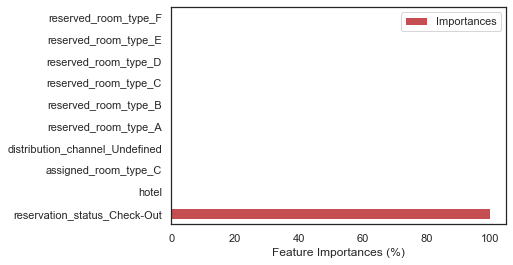

In [63]:
pd.DataFrame(data = cart_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:10].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

### In the correlation part, we have seen the impact of reservation status. Reservation status dominates other features totally. By keeping reservation_status in data, it is possible to achieve 100% accuracy rate because that feature is direct way to predict cancellations, its like cheating. For the sake of analysis I will drop reservation_status and continue analysis without it.



In [64]:

df1.columns



Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'deposit_given', 'total_nights', 'meal_BB', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_A', 'reserved_room_type_B', 'reserved_room_type_C',
  

In [65]:
df2 = df1.drop(columns = ['reservation_status_Canceled', 'reservation_status_Check-Out',
       'reservation_status_No-Show' ],axis = 1)


In [66]:
df2.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'deposit_given', 'total_nights', 'meal_BB', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_A', 'reserved_room_type_B', 'reserved_room_type_C',
  

In [67]:
y = df2["is_canceled"]
X = df2.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [68]:
# We can use the functions to apply the models and roc curves to save space.
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


# Model and ROC Curve Comparison

### Logistic Regression Model

In [69]:
print ('Model: Logistic Regression \n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)



Model: Logistic Regression 

Accuracy Score: 0.8043508732583892

Confusion Matrix:
 [[20495  1858]
 [ 5121  8197]]


In [70]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())


Mean Score of CV:  0.7698779468192598


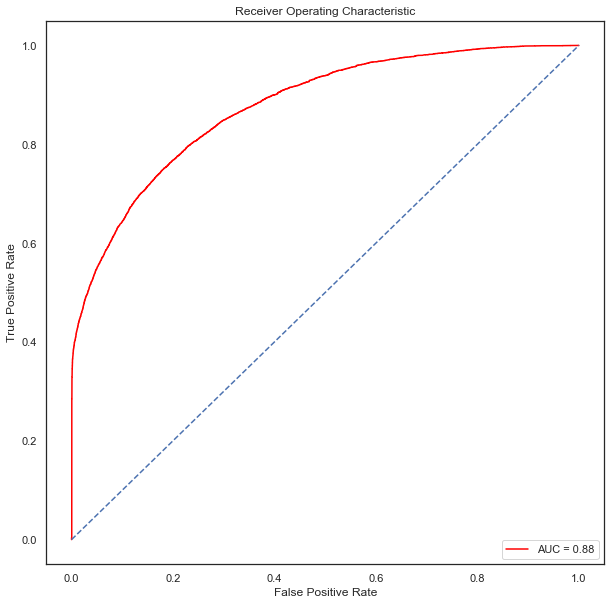

In [71]:
ROC(y_test, y_prob)



### Gaussian Naive Bayes Model

In [72]:
print('Model : Gaussian Naive Bayes \n ')
model(GaussianNB(),X_train, X_test, y_train, y_test)



Model : Gaussian Naive Bayes 
 
Accuracy Score: 0.586246530795324

Confusion Matrix:
 [[ 9604 12749]
 [ 2010 11308]]


In [73]:
NB = GaussianNB()
cv_scores = cross_val_score(NB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())



Mean Score of CV:  0.5624352830436607


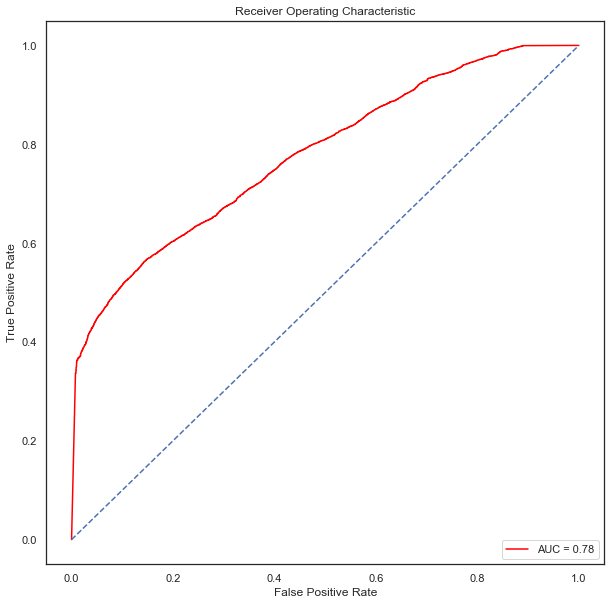

In [74]:
ROC(y_test, y_prob)



# Support Vector Classification Model

In [75]:
#I excluded probability in the function for SVC

print('Model: SVC \n')
def model1(algorithm,X_train,X_test,y_train,y_test):
    alg = algorithm
    alg_model = alg.fit(X_train,y_train)
    global y_pred
    y_pred = alg_model.predict(X_test)
    
    
    print('Accuracy Score: {}\n\n Confusion Matrix:\n'.format(accuracy_score(y_test,y_pred),
                                                              confusion_matrix(y_test,y_pred)))
    
model1(SVC(kernel ='linear'),X_train,X_test,y_train,y_test)



Model: SVC 

Accuracy Score: 0.7942586414734658

 Confusion Matrix:



## Decision Tree Model (reservation_status excluded)

In [76]:
print('Model: Decision Tree\n')
model(DecisionTreeClassifier(max_depth = 12), X_train, X_test, y_train, y_test)



Model: Decision Tree

Accuracy Score: 0.8462056011886406

Confusion Matrix:
 [[20369  1984]
 [ 3502  9816]]


In [77]:
DTC = DecisionTreeClassifier(max_depth = 12)
cv_scores = cross_val_score(DTC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())


Mean Score of CV:  0.6728731690426323


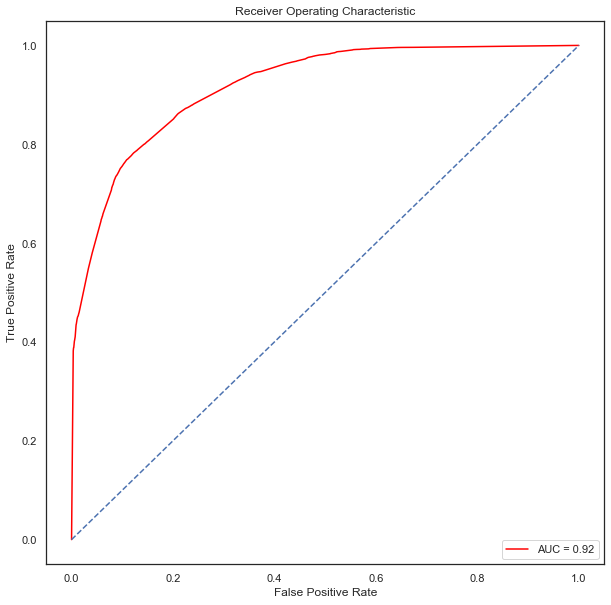

In [78]:
ROC(y_test, y_prob)



# Random Forest

In [79]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8727537775784251

Confusion Matrix:
 [[20958  1395]
 [ 3144 10174]]


In [80]:
RFC = RandomForestClassifier()
cv_scores = cross_val_score(RFC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6751013846573184


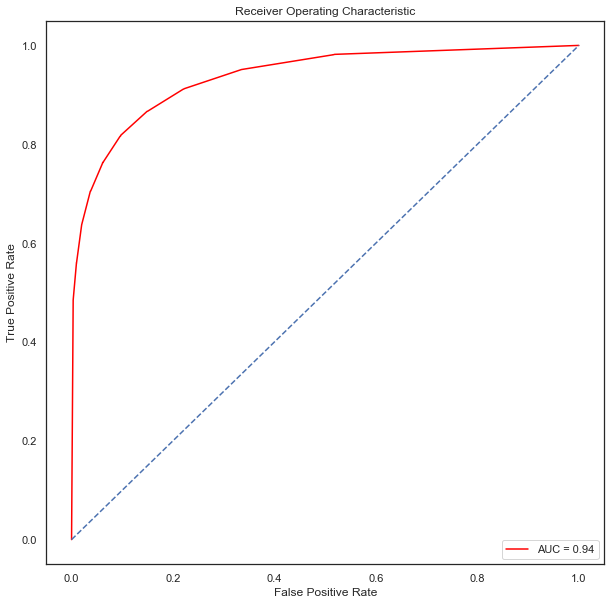

In [81]:
ROC(y_test, y_prob)

### Random Forest Model Tuning

In [82]:
rf_parameters = {"max_depth": [10,13],
                 "n_estimators": [10,100,500],
                 "min_samples_split": [2,5]}


In [83]:
rf_model = RandomForestClassifier()

In [84]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.2min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [85]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

Best parameters: {'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 500}


In [86]:
rf_tuned = RandomForestClassifier(max_depth = 13,
                                  min_samples_split = 2,
                                  n_estimators = 500)

print('Model: Random Forest Tuned\n')
model(rf_tuned, X_train, X_test, y_train, y_test)

Model: Random Forest Tuned

Accuracy Score: 0.851475988898545

Confusion Matrix:
 [[21146  1207]
 [ 4091  9227]]


In [87]:
rf_tuned = RandomForestClassifier(max_depth = 13,
                                  min_samples_split = 2,
                                  n_estimators = 500)

print('Model: Random Forest Tuned\n')
model(rf_tuned, X_train, X_test, y_train, y_test)

Model: Random Forest Tuned

Accuracy Score: 0.8515600908300861

Confusion Matrix:
 [[21141  1212]
 [ 4083  9235]]


Tuned model has worse accuracy score than default one. In the default model there is no limit for max depth. Increasing max depth gives us better accuracy scores but may decrease generalization.

### XGBoost Model

In [88]:
print('Model: XGBoost\n')
model(XGBClassifier(), X_train, X_test, y_train, y_test)

Model: XGBoost

Accuracy Score: 0.84043060188949

Confusion Matrix:
 [[20538  1815]
 [ 3877  9441]]


In [89]:
XGB = XGBClassifier()
cv_scores = cross_val_score(XGB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7326369896219025


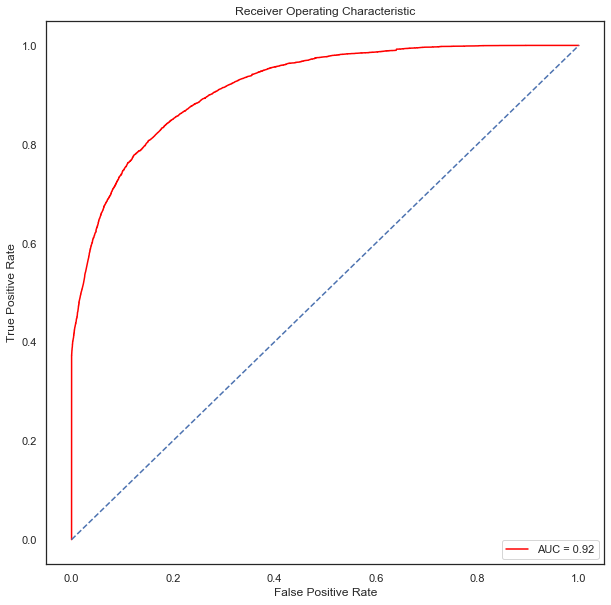

In [90]:
ROC(y_test, y_prob)

## Neural Network Model Tuning

In [91]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
print('Model: Neural Network\n')
model(MLPClassifier(), X_train_scaled, X_test_scaled, y_train, y_test)

Model: Neural Network

Accuracy Score: 0.8500462560623475

Confusion Matrix:
 [[20469  1884]
 [ 3465  9853]]


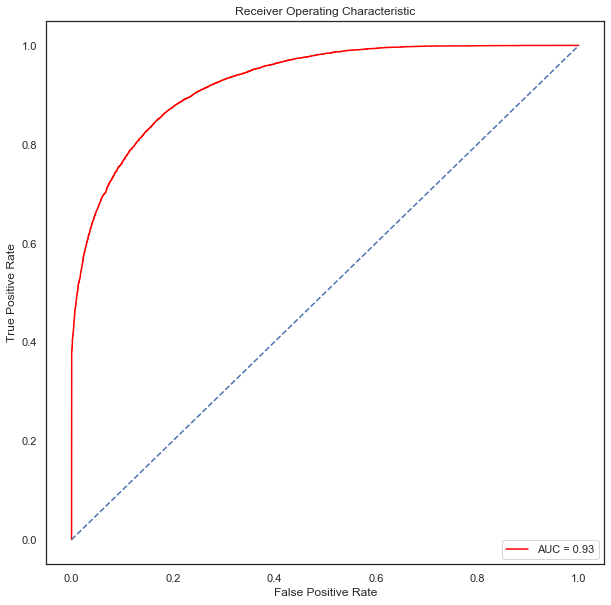

In [93]:
ROC(y_test, y_prob)

In [94]:
mlpc_parameters = {"alpha": [1, 0.1, 0.01, 0.001],
                   "hidden_layer_sizes": [(50,50,50),
                                          (100,100)],
                   "solver": ["adam", "sgd"],
                   "activation": ["logistic", "relu"]}

In [95]:
#mlpc = MLPClassifier()
#mlpc_cv_model = GridSearchCV(mlpc, mlpc_parameters,
              #               cv = 10,
                  #           n_jobs = -1,
                     #        verbose = 2)
#
#mlpc_cv_model.fit(X_train_scaled, y_train)

IndentationError: unexpected indent (<ipython-input-95-5545540dacca>, line 3)

In [ ]:
#print('Best parameters: ' + str(mlpc_cv_model.best_params_))

In [ ]:
#mlpc_tuned = MLPClassifier(activation = 'relu',
                           alpha = 0.1,
                           hidden_layer_sizes = (100,100),
                           solver = 'adam')

In [ ]:
#print('Model: Neural Network Tuned\n')
#model(mlpc_tuned, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
#ROC(y_test, y_prob)

# Conclusion

### Feature Importances

Text(0.5, 0, 'Feature Importances (%)')

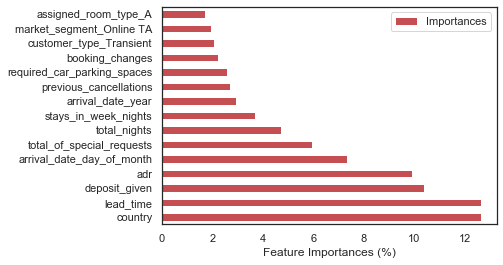

In [96]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", 
                                                                                                    color = "r")

plt.xlabel("Feature Importances (%)")



Summary Table of the Models



In [97]:
table = pd.DataFrame({"Model": ["Decision Tree (reservation status included)", "Logistic Regression",
                                "Naive Bayes", "Support Vector", "Decision Tree", "Random Forest",
                                "Random Forest Tuned", "XGBoost", "Neural Network", "Neural Network Tuned"],
                     "Accuracy Scores": ["1", "0.804", "0.582", "0.794", "0.846",
                                         "0.883", "0.851", "0.869", "0.848", "0.859"],
                     "ROC | Auc": ["1", "0.88", "0.78", "0",
                                   "0.92", "0.95", "0", "0.94",
                                   "0.93", "0.94"]})


table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")
table["ROC | Auc"] = table["ROC | Auc"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores,ROC | Auc
Model,,
Decision Tree (reservation status included),1.000,1.00
Random Forest,0.883,0.95
XGBoost,0.869,0.94
Neural Network Tuned,0.859,0.94
Random Forest Tuned,0.851,0.00
Neural Network,0.848,0.93
Decision Tree,0.846,0.92
Logistic Regression,0.804,0.88
Support Vector,0.794,0.00
